In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cohlib.utils import pickle_open, logistic
from cohlib.plot import draw_raster_single

In [2]:
mu = -1.0
K = 3
L = 25 
C = 10
sample_length = 1000
seed = 8
o1 = 1.0
o2 = 2.0
# plot_synthetic_data(L, sample_length, C, seed, mu, o1, o2, start=3)



In [3]:
data_path = f'saved/synthetic_data/simple_synthetic_gaussian_{K}_{L}_{sample_length}_{C}_{mu}_{o1}_{o2}_{seed}'
model_path = f'saved/fitted_models/simple_synthetic_gaussian_{K}_{L}_{sample_length}_{C}_{mu}_{o1}_{o2}_{seed}_fitted'

data_load = pickle_open(data_path)
model_load = pickle_open(model_path)
Gamma = data_load['latent']['Gamma']
zs = data_load['latent']['zs']
ys = data_load['observed']['ys']

freqs = data_load['meta']['freqs']

Wv_model = model_load['Wv']
Wv = Wv_model
freqs_mod = freqs[:int((Wv.shape[1] - 1) / 2)]

J_max = int((Wv.shape[1]-1)/2)


In [4]:
xs = data_load['latent']['xs']

In [34]:
xs[2,:,:2]

array([[-0.91753859, -0.90673352],
       [-0.86485532, -0.85676564],
       [-1.2746079 , -1.31493724]])

In [35]:
alphas = np.array([1,2,5])
xs.shape
test = alphas[None,:,None] + xs

In [36]:
test[0,:,:2]

array([[-1.04039667, -1.0828517 ],
       [ 2.59171953,  2.57327075],
       [ 3.66542035,  3.70560498]])

In [37]:
from cohlib.utils import logistic
test_logistic = logistic(test)

In [38]:
test_logistic[0,:,:2]

array([[0.26107346, 0.25296674],
       [0.93032676, 0.92912139],
       [0.97504527, 0.9760046 ]])

In [16]:
Cs = [1,10,25,500]
ovs = [2.0, 0.0, -2.0]
J_max = 49

num_groups = K
num_trials = L

o1 = 1.0
power1s = np.zeros((len(Cs), len(ovs), 4, J_max))
power1dBs = np.zeros((len(Cs), len(ovs), 4, J_max))
for c, num_neurons in enumerate(Cs):
    for i2, o2 in enumerate(ovs):
        power1_true, power1_zs, power1_model, power1_naive = load_and_calc(get_power1, num_groups, num_trials, 1000, num_neurons, mu, o1, o2, 'analytical')
        power1s[c,i2,0,:] = power1_true
        power1s[c,i2,1,:] = power1_zs
        power1s[c,i2,2,:] = power1_model
        power1s[c,i2,3,:] = power1_naive * (2*np.pi)**2

        power1dBs[c,i2,0,:] = 10*np.log10(power1_true)
        power1dBs[c,i2,1,:] = 10*np.log10(power1_zs)
        power1dBs[c,i2,2,:] = 10*np.log10(power1_model)
        power1dBs[c,i2,3,:] = 10*np.log10(power1_naive * (2*np.pi)**2)

3 25 1 -1.0
3 25 1 -1.0
3 25 1 -1.0
3 25 10 -1.0
3 25 10 -1.0
3 25 10 -1.0
3 25 25 -1.0
3 25 25 -1.0
3 25 25 -1.0
3 25 500 -1.0
3 25 500 -1.0
3 25 500 -1.0


In [14]:
from numpy.fft import rfft

def plot_power1_ov_c():
    fig, ax = plt.subplots(4,3, figsize=(15,8), sharex=True, sharey=True)
    for i1 in range(len(Cs)):
        for i2 in range(len(ovs)):
            power1_true = power1s[i1,i2,0,:] 
            power1_zs = power1s[i1,i2,1,:] 
            power1_model = power1s[i1,i2,2,:] 
            power1_naive = power1s[i1,i2,3,:] 

            ax[i1,i2].plot(freqs_mod, power1_true, color='k', label='true', linewidth=3)
            ax[i1,i2].plot(freqs_mod, power1_naive, linestyle='--', color='tab:red', label='naive')
            ax[i1,i2].plot(freqs_mod, power1_zs, color='tab:green', label='direct')
            ax[i1,i2].plot(freqs_mod, power1_model, color='tab:blue', linewidth=3, label='model')

            ax[i1,i2].set_title(f'# neurons = {Cs[i1]}, var = 1e{ovs[i2]}', fontweight='bold', fontsize=14)
            if i2 == 0:
                ax[i1,i2].set_ylabel(f'Power', fontweight='bold', fontsize=14)
            if i1 == len(Cs)-1:
                ax[i1,i2].set_xlabel('Freq (Hz)', fontweight='bold', fontsize=14)
            # if k == 3:
                # low = np.round(math.floor((1/Ks[k]) * 10)*(1/10),3)
                # ax[i1,i2].set_ylim([low, 1])
    plt.tight_layout()

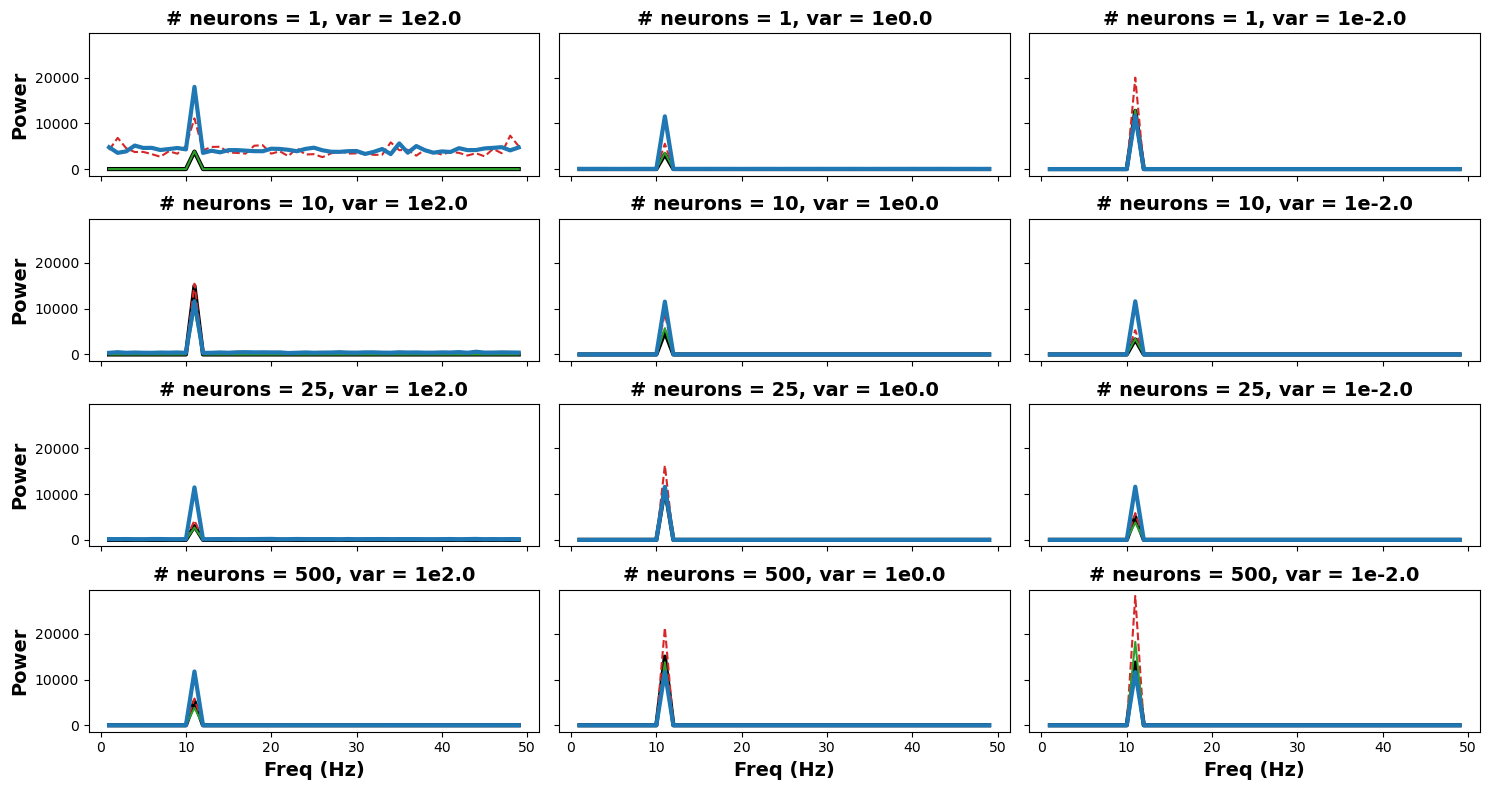

In [15]:
# approx
plot_power1_ov_c()

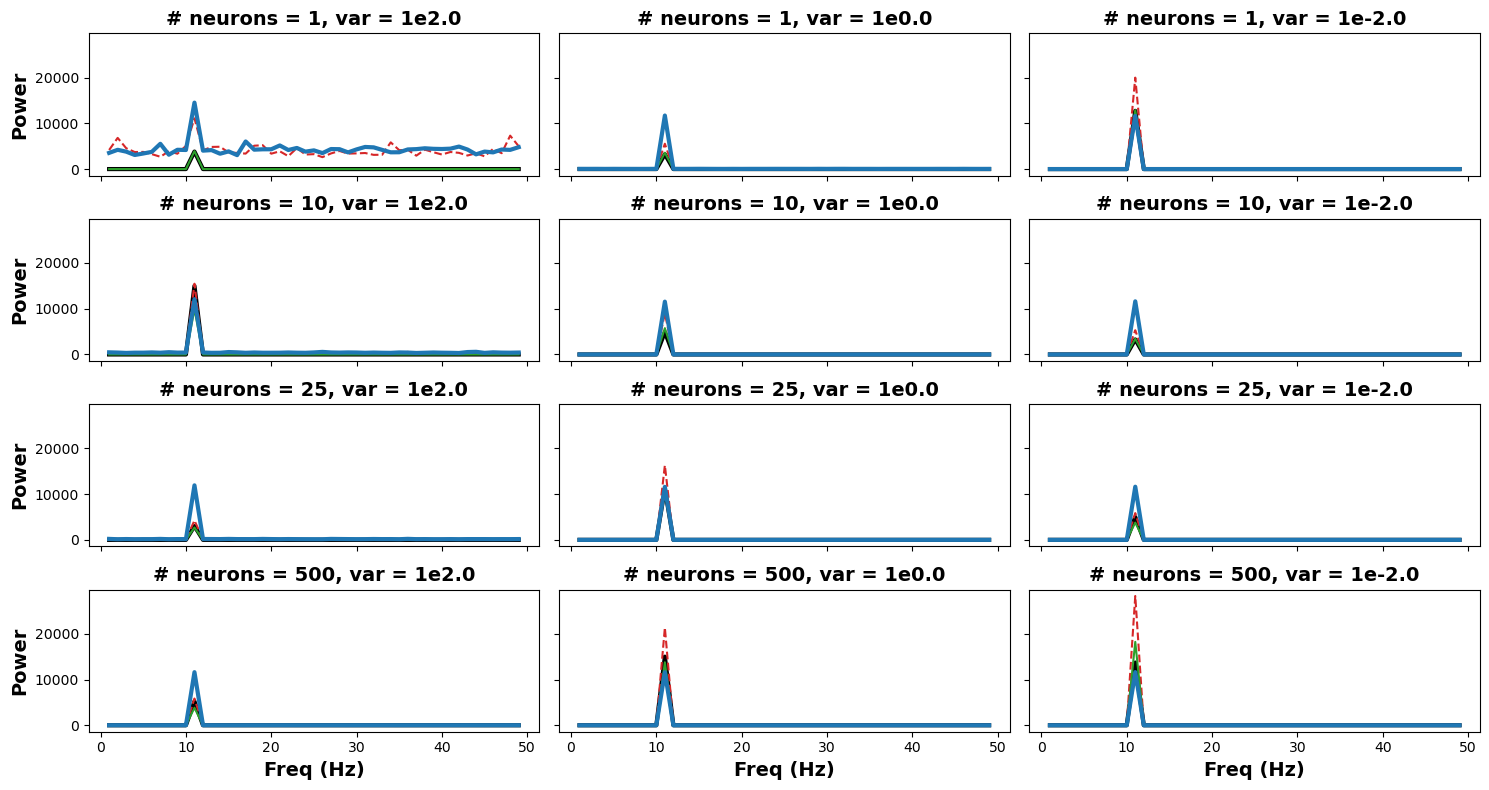

In [17]:
plot_power1_ov_c()

In [12]:
num_em = 10
from numpy.fft import rfft

def plot_power1dB_ov_c():
    fig, ax = plt.subplots(4,3, figsize=(15,8), sharex=True, sharey=True)
    for i1 in range(len(Cs)):
        for i2 in range(len(ovs)):
            power1dB_true = power1dBs[i1,i2,0,:] 
            power1dB_zs = power1dBs[i1,i2,1,:] 
            power1dB_model = power1dBs[i1,i2,2,:] 
            power1dB_naive = power1dBs[i1,i2,3,:] 

            ax[i1,i2].plot(freqs_mod, power1dB_true, color='k', label='true', linewidth=3)
            ax[i1,i2].plot(freqs_mod, power1dB_naive, linestyle='--', color='tab:red', label='naive')
            ax[i1,i2].plot(freqs_mod, power1dB_zs, color='tab:green', label='direct')
            ax[i1,i2].plot(freqs_mod, power1dB_model, color='tab:blue', linewidth=3, label='model')

            ax[i1,i2].set_title(f'# neurons = {Cs[i1]}, var = 1e{ovs[i2]}', fontweight='bold', fontsize=14)
            if i2 == 0:
                ax[i1,i2].set_ylabel(f'Power (dB)', fontweight='bold', fontsize=14)
            if i1 == len(Cs)-1:
                ax[i1,i2].set_xlabel('Freq (Hz)', fontweight='bold', fontsize=14)
            # if k == 3:
                # low = np.round(math.floor((1/Ks[k]) * 10)*(1/10),3)
                # ax[i1,i2].set_ylim([low, 1])
    plt.tight_layout()

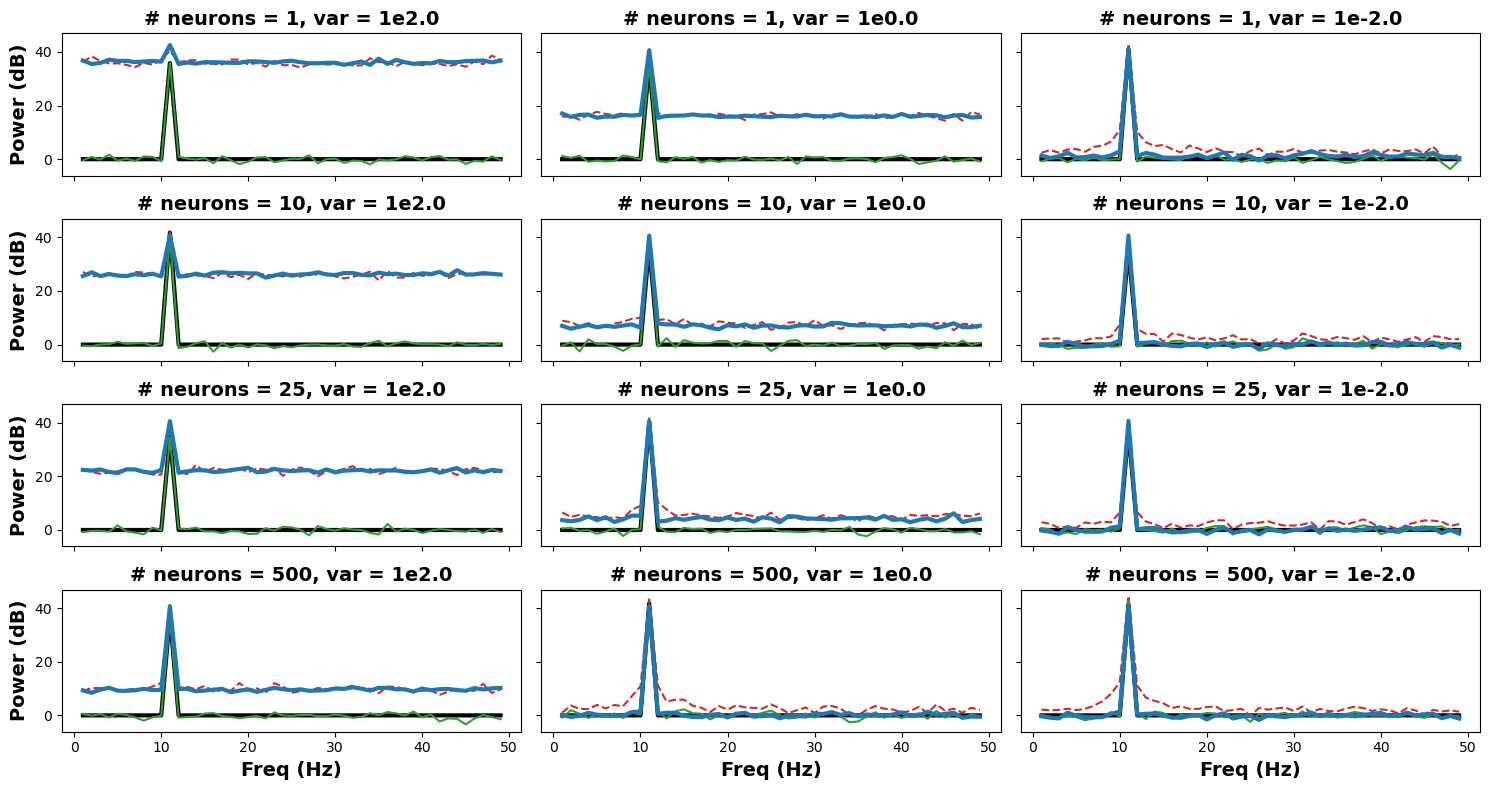

In [13]:
#approx
plot_power1dB_ov_c()

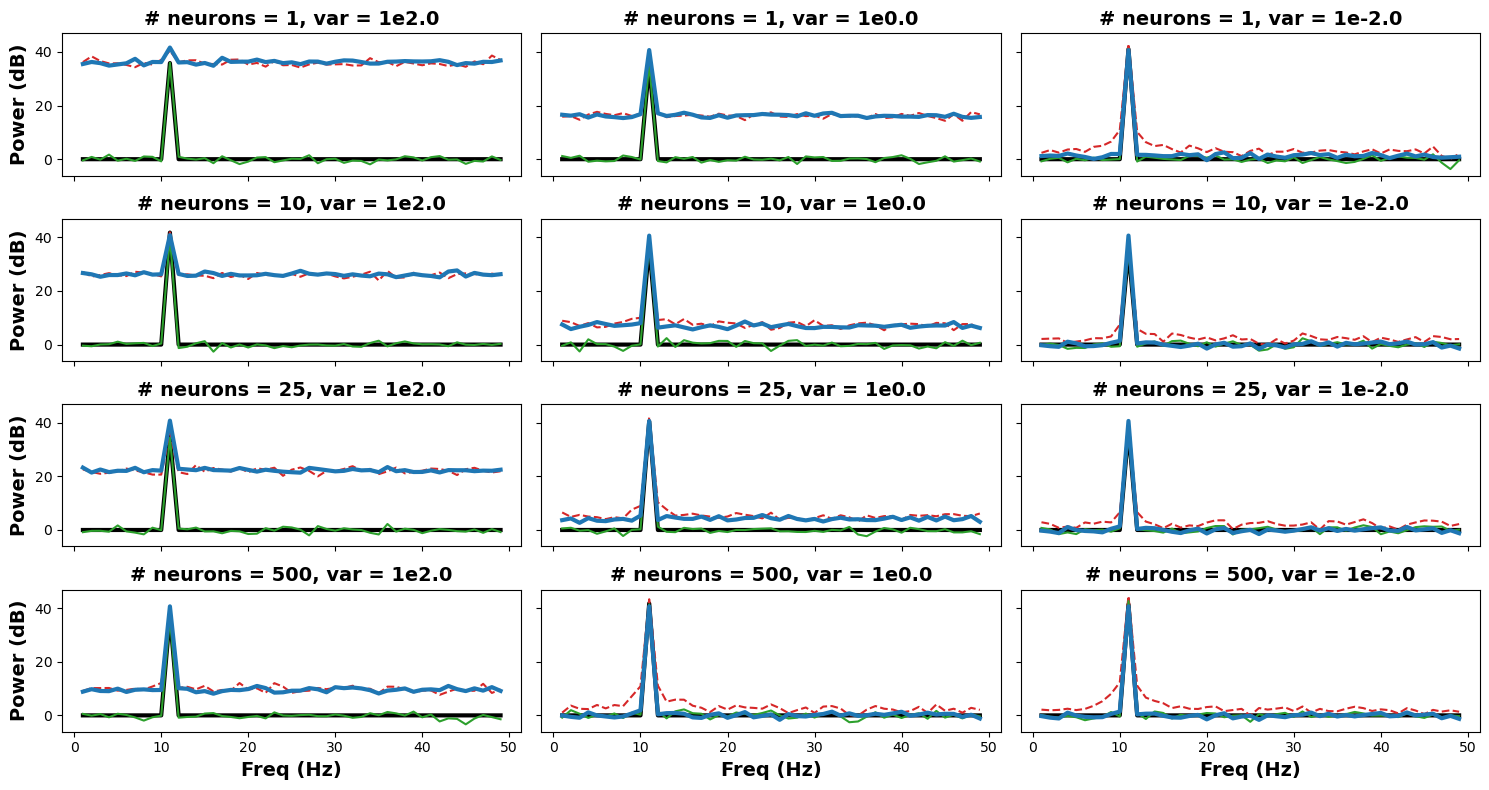

In [18]:
plot_power1dB_ov_c()